In [1]:
import os
import json
import matplotlib.pyplot as plt
from scipy import stats
import pickle

from matplotlib import rcParams
import numpy as np
import seaborn as sns

rcParams["font.family"] = "serif"
rcParams["grid.linestyle"] = ':'
rcParams["xtick.direction"] = 'in'
rcParams["ytick.direction"] = 'in'
rcParams["legend.fontsize"] = 9
rcParams["axes.labelsize"] = 20
rcParams["axes.titlesize"] = 20
rcParams["xtick.labelsize"] = 15
rcParams["ytick.labelsize"] = 15

## Load data

In [2]:
search_counts_dir = '../search_counts'

In [3]:
image_search_counts = [os.path.join(search_counts_dir, x) for x in os.listdir(search_counts_dir) if '0.7_' in x and 'integrated' not in x]

text_search_counts = [os.path.join(search_counts_dir, x) for x in os.listdir(search_counts_dir) if 'lemmatized' in x and 'integrated' not in x]

integrated_search_counts = [os.path.join(search_counts_dir, x) for x in os.listdir(search_counts_dir) if '0.7_' in x and 'lemmatized' in x and 'integrated' in x]

In [5]:
datasets = [
    'imagenet', 
    'cifar10', 
    'cifar100', 
    'caltech101', 
    'caltech256', 
    'sun397', 
    'birdsnap', 
    'country211', 
    'cub', 
    'dtd', 
    'eurosat', 
    'fgvcaircraft', 
    'flowers102', 
    'food101', 
    # 'imagenet-sketch', 
    'oxfordpets', 
    'stanfordcars', 
    'ucf101'
]

## Text long-tailed nature

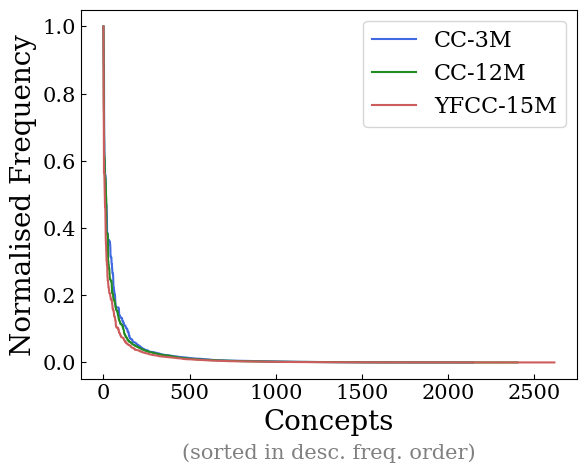

In [6]:
cc3m_relevant_text_count_files = [x for x in text_search_counts if 'cc3m' in x]
cc12m_relevant_text_count_files = [x for x in text_search_counts if 'cc12m' in x]
yfcc15m_relevant_text_count_files = [x for x in text_search_counts if 'yfcc15m' in x]

cc3m_text_concept_counts = []
cc12m_text_concept_counts = []
yfcc15m_text_concept_counts = []

for dataset in datasets:
    cc3m_text_f = '../search_counts/{}_cc3m_lemmatized_search_counts.json'.format(dataset)
    cc12m_text_f = '../search_counts/{}_cc12m_lemmatized_search_counts.json'.format(dataset)
    yfcc15m_text_f = '../search_counts/{}_yfcc15m_lemmatized_search_counts.json'.format(dataset)

    with open(cc3m_text_f) as f:
        curr_cc3m_text_counts = json.load(f)

    with open(cc12m_text_f) as f:
        curr_cc12m_text_counts = json.load(f)

    with open(yfcc15m_text_f) as f:
        curr_yfcc15m_text_counts = json.load(f)
    
    for k in sorted(list(curr_cc3m_text_counts.keys())):
        cc3m_text_concept_counts.append(curr_cc3m_text_counts[k])
        cc12m_text_concept_counts.append(curr_cc12m_text_counts[k])
        yfcc15m_text_concept_counts.append(curr_yfcc15m_text_counts[k])

np_cc3m_concept_counts = np.asarray(cc3m_text_concept_counts) / max(cc3m_text_concept_counts)
np_cc12m_concept_counts = np.asarray(cc12m_text_concept_counts) / max(cc12m_text_concept_counts)
np_yfcc15m_concept_counts = np.asarray(yfcc15m_text_concept_counts) / max(yfcc15m_text_concept_counts)

plt.figure()
plt.plot(sorted(np_cc3m_concept_counts[np_cc3m_concept_counts>0], reverse=True), c='royalblue', label='CC-3M')
plt.plot(sorted(np_cc12m_concept_counts[np_cc12m_concept_counts>0], reverse=True), c='forestgreen', label='CC-12M')
plt.plot(sorted(np_yfcc15m_concept_counts[np_yfcc15m_concept_counts>0], reverse=True), c='indianred', label='YFCC-15M')

plt.xlabel('Concepts')
ax = plt.gca()
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0)
ax.annotate('(sorted in desc. freq. order)', 
            xy=(0.5, -0.2), xycoords='axes fraction',
            fontsize=rcParams["axes.labelsize"]-5, 
            ha="center", va="center",
            bbox=bbox_props,
            color='grey')
plt.ylabel('Normalised Frequency')
plt.legend(loc='best', fontsize=16)
# plt.xscale('log')
# plt.yscale('log')
# # plt.xticks(rotation=45)
plt.savefig('./plots/dpfm-paper-text-search-long-tailed.png', dpi=500, bbox_inches='tight')

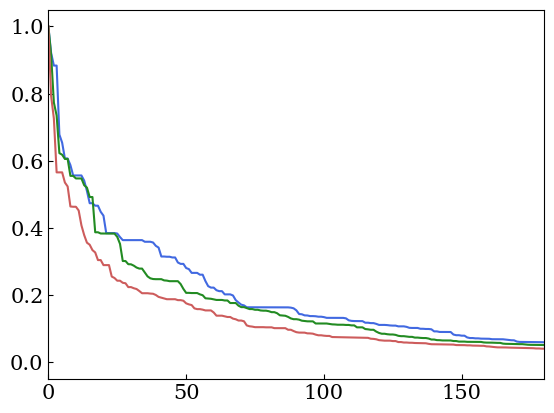

In [7]:
cc3m_relevant_text_count_files = [x for x in text_search_counts if 'cc3m' in x]
cc12m_relevant_text_count_files = [x for x in text_search_counts if 'cc12m' in x]
yfcc15m_relevant_text_count_files = [x for x in text_search_counts if 'yfcc15m' in x]

cc3m_text_concept_counts = []
cc12m_text_concept_counts = []
yfcc15m_text_concept_counts = []

for dataset in datasets:
    cc3m_text_f = '../search_counts/{}_cc3m_lemmatized_search_counts.json'.format(dataset)
    cc12m_text_f = '../search_counts/{}_cc12m_lemmatized_search_counts.json'.format(dataset)
    yfcc15m_text_f = '../search_counts/{}_yfcc15m_lemmatized_search_counts.json'.format(dataset)

    with open(cc3m_text_f) as f:
        curr_cc3m_text_counts = json.load(f)

    with open(cc12m_text_f) as f:
        curr_cc12m_text_counts = json.load(f)

    with open(yfcc15m_text_f) as f:
        curr_yfcc15m_text_counts = json.load(f)
    
    for k in sorted(list(curr_cc3m_text_counts.keys())):
        cc3m_text_concept_counts.append(curr_cc3m_text_counts[k])
        cc12m_text_concept_counts.append(curr_cc12m_text_counts[k])
        yfcc15m_text_concept_counts.append(curr_yfcc15m_text_counts[k])

np_cc3m_concept_counts = np.asarray(cc3m_text_concept_counts) / max(cc3m_text_concept_counts)
np_cc12m_concept_counts = np.asarray(cc12m_text_concept_counts) / max(cc12m_text_concept_counts)
np_yfcc15m_concept_counts = np.asarray(yfcc15m_text_concept_counts) / max(yfcc15m_text_concept_counts)

plt.figure()
plt.plot(sorted(np_cc3m_concept_counts[np_cc3m_concept_counts>0], reverse=True), c='royalblue', label='CC-3M')
plt.plot(sorted(np_cc12m_concept_counts[np_cc12m_concept_counts>0], reverse=True), c='forestgreen', label='CC-12M')
plt.plot(sorted(np_yfcc15m_concept_counts[np_yfcc15m_concept_counts>0], reverse=True), c='indianred', label='YFCC-15M')

# plt.xlabel('Concepts')
# ax = plt.gca()
# bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0)
# ax.annotate('(sorted in desc. freq. order)', 
#             xy=(0.5, -0.2), xycoords='axes fraction',
#             fontsize=rcParams["axes.labelsize"]-5, 
#             ha="center", va="center",
#             bbox=bbox_props,
#             color='grey')
# plt.ylabel('Normalised Frequency')
# plt.legend(loc='best', fontsize=16)
plt.xlim(0, 180)
# plt.xscale('log')
# plt.yscale('log')
# # plt.xticks(rotation=45)
plt.savefig('./plots/dpfm-paper-text-search-long-tailed-zoomed.png', dpi=500, bbox_inches='tight')

## Image long-tailed nature

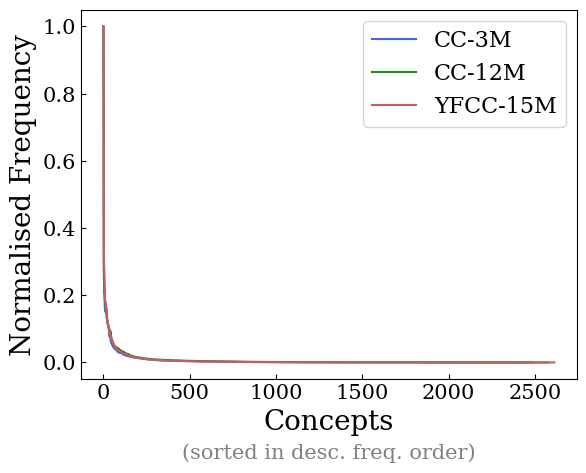

In [8]:
cc3m_relevant_image_count_files = [x for x in image_search_counts if 'cc3m' in x]
cc12m_relevant_image_count_files = [x for x in image_search_counts if 'cc12m' in x]
yfcc15m_relevant_image_count_files = [x for x in image_search_counts if 'yfcc15m' in x]

cc3m_image_concept_counts = []
cc12m_image_concept_counts = []
yfcc15m_image_concept_counts = []

for dataset in datasets:
    cc3m_image_f = '../search_counts/{}_cc3m_rampp0.7_search_counts.json'.format(dataset)
    cc12m_image_f = '../search_counts/{}_cc12m_rampp0.7_search_counts.json'.format(dataset)
    yfcc15m_image_f = '../search_counts/{}_yfcc15m_rampp0.7_search_counts.json'.format(dataset)

    with open(cc3m_image_f) as f:
        curr_cc3m_image_counts = json.load(f)

    with open(cc12m_image_f) as f:
        curr_cc12m_image_counts = json.load(f)

    with open(yfcc15m_image_f) as f:
        curr_yfcc15m_image_counts = json.load(f)
    
    for k in sorted(list(curr_cc3m_image_counts.keys())):
        cc3m_image_concept_counts.append(curr_cc3m_image_counts[k])
        cc12m_image_concept_counts.append(curr_cc12m_image_counts[k])
        yfcc15m_image_concept_counts.append(curr_yfcc15m_image_counts[k])

np_cc3m_concept_counts = np.asarray(cc3m_image_concept_counts) / max(cc3m_image_concept_counts)
np_cc12m_concept_counts = np.asarray(cc12m_image_concept_counts) / max(cc12m_image_concept_counts)
np_yfcc15m_concept_counts = np.asarray(yfcc15m_image_concept_counts) / max(yfcc15m_image_concept_counts)

plt.figure()
plt.plot(sorted(np_cc3m_concept_counts[np_cc3m_concept_counts>0], reverse=True), c='royalblue', label='CC-3M')
plt.plot(sorted(np_cc12m_concept_counts[np_cc12m_concept_counts>0], reverse=True), c='forestgreen', label='CC-12M')
plt.plot(sorted(np_yfcc15m_concept_counts[np_yfcc15m_concept_counts>0], reverse=True), c='indianred', label='YFCC-15M')

plt.xlabel('Concepts')
ax = plt.gca()
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0)
ax.annotate('(sorted in desc. freq. order)', 
            xy=(0.5, -0.2), xycoords='axes fraction',
            fontsize=rcParams["axes.labelsize"]-5, 
            ha="center", va="center",
            bbox=bbox_props,
            color='grey')
plt.ylabel('Normalised Frequency')
plt.legend(loc='best', fontsize=16)
# plt.xscale('log')
# plt.yscale('log')
# # plt.xticks(rotation=45)
plt.savefig('./plots/dpfm-paper-image-search-long-tailed.png', dpi=500, bbox_inches='tight')

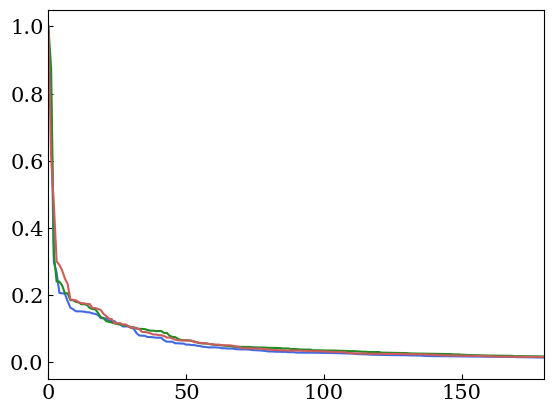

In [9]:
cc3m_relevant_image_count_files = [x for x in image_search_counts if 'cc3m' in x]
cc12m_relevant_image_count_files = [x for x in image_search_counts if 'cc12m' in x]
yfcc15m_relevant_image_count_files = [x for x in image_search_counts if 'yfcc15m' in x]

cc3m_image_concept_counts = []
cc12m_image_concept_counts = []
yfcc15m_image_concept_counts = []

for dataset in datasets:
    cc3m_image_f = '../search_counts/{}_cc3m_rampp0.7_search_counts.json'.format(dataset)
    cc12m_image_f = '../search_counts/{}_cc12m_rampp0.7_search_counts.json'.format(dataset)
    yfcc15m_image_f = '../search_counts/{}_yfcc15m_rampp0.7_search_counts.json'.format(dataset)

    with open(cc3m_image_f) as f:
        curr_cc3m_image_counts = json.load(f)

    with open(cc12m_image_f) as f:
        curr_cc12m_image_counts = json.load(f)

    with open(yfcc15m_image_f) as f:
        curr_yfcc15m_image_counts = json.load(f)
    
    for k in sorted(list(curr_cc3m_image_counts.keys())):
        cc3m_image_concept_counts.append(curr_cc3m_image_counts[k])
        cc12m_image_concept_counts.append(curr_cc12m_image_counts[k])
        yfcc15m_image_concept_counts.append(curr_yfcc15m_image_counts[k])

np_cc3m_concept_counts = np.asarray(cc3m_image_concept_counts) / max(cc3m_image_concept_counts)
np_cc12m_concept_counts = np.asarray(cc12m_image_concept_counts) / max(cc12m_image_concept_counts)
np_yfcc15m_concept_counts = np.asarray(yfcc15m_image_concept_counts) / max(yfcc15m_image_concept_counts)

plt.figure()
plt.plot(sorted(np_cc3m_concept_counts[np_cc3m_concept_counts>0], reverse=True), c='royalblue', label='CC-3M')
plt.plot(sorted(np_cc12m_concept_counts[np_cc12m_concept_counts>0], reverse=True), c='forestgreen', label='CC-12M')
plt.plot(sorted(np_yfcc15m_concept_counts[np_yfcc15m_concept_counts>0], reverse=True), c='indianred', label='YFCC-15M')

# plt.xlabel('Concepts')
# ax = plt.gca()
# bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0)
# ax.annotate('(sorted in desc. freq. order)', 
#             xy=(0.5, -0.2), xycoords='axes fraction',
#             fontsize=rcParams["axes.labelsize"]-5, 
#             ha="center", va="center",
#             bbox=bbox_props,
#             color='grey')
# plt.ylabel('Normalised Frequency')
# plt.legend(loc='best', fontsize=16)
plt.xlim(0, 180)
# plt.xscale('log')
# plt.yscale('log')
# # plt.xticks(rotation=45)
plt.savefig('./plots/dpfm-paper-image-search-long-tailed-zoomed.png', dpi=500, bbox_inches='tight')

## Integrated long-tailed nature

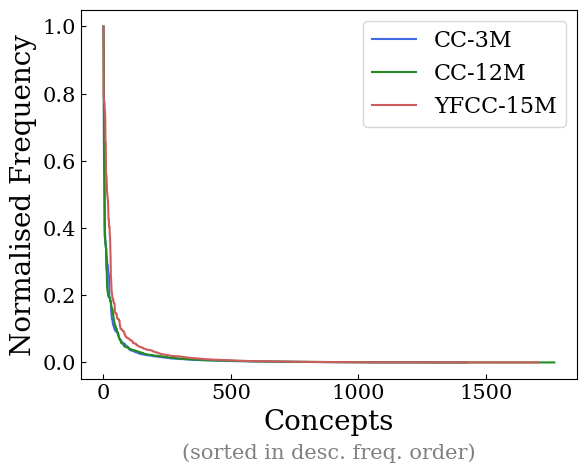

In [10]:
cc3m_relevant_integrated_count_files = [x for x in integrated_search_counts if 'cc3m' in x]
cc12m_relevant_integrated_count_files = [x for x in integrated_search_counts if 'cc12m' in x]
yfcc15m_relevant_integrated_count_files = [x for x in integrated_search_counts if 'yfcc15m' in x]

cc3m_integrated_concept_counts = []
cc12m_integrated_concept_counts = []
yfcc15m_integrated_concept_counts = []

for dataset in datasets:
    cc3m_integrated_f = '../search_counts/{}_cc3m_integrated_tlemmatized_i0.7_search_counts.json'.format(dataset)
    cc12m_integrated_f = '../search_counts/{}_cc12m_integrated_tlemmatized_i0.7_search_counts.json'.format(dataset)
    yfcc15m_integrated_f = '../search_counts/{}_yfcc15m_integrated_tlemmatized_i0.7_search_counts.json'.format(dataset)

    with open(cc3m_integrated_f) as f:
        curr_cc3m_integrated_counts = json.load(f)

    with open(cc12m_integrated_f) as f:
        curr_cc12m_integrated_counts = json.load(f)

    with open(yfcc15m_integrated_f) as f:
        curr_yfcc15m_integrated_counts = json.load(f)
    
    for k in sorted(list(curr_cc3m_integrated_counts.keys())):
        cc3m_integrated_concept_counts.append(curr_cc3m_integrated_counts[k])
        cc12m_integrated_concept_counts.append(curr_cc12m_integrated_counts[k])
        yfcc15m_integrated_concept_counts.append(curr_yfcc15m_integrated_counts[k])

np_cc3m_concept_counts = np.asarray(cc3m_integrated_concept_counts) / max(cc3m_integrated_concept_counts)
np_cc12m_concept_counts = np.asarray(cc12m_integrated_concept_counts) / max(cc12m_integrated_concept_counts)
np_yfcc15m_concept_counts = np.asarray(yfcc15m_integrated_concept_counts) / max(yfcc15m_integrated_concept_counts)

plt.figure()
plt.plot(sorted(np_cc3m_concept_counts[np_cc3m_concept_counts>0], reverse=True), c='royalblue', label='CC-3M')
plt.plot(sorted(np_cc12m_concept_counts[np_cc12m_concept_counts>0], reverse=True), c='forestgreen', label='CC-12M')
plt.plot(sorted(np_yfcc15m_concept_counts[np_yfcc15m_concept_counts>0], reverse=True), c='indianred', label='YFCC-15M')

plt.xlabel('Concepts')
ax = plt.gca()
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0)
ax.annotate('(sorted in desc. freq. order)', 
            xy=(0.5, -0.2), xycoords='axes fraction',
            fontsize=rcParams["axes.labelsize"]-5, 
            ha="center", va="center",
            bbox=bbox_props,
            color='grey')
plt.ylabel('Normalised Frequency')
plt.legend(loc='best', fontsize=16)
# plt.xscale('log')
# plt.yscale('log')
# # plt.xticks(rotation=45)
plt.savefig('./plots/dpfm-paper-integrated-search-long-tailed.png', dpi=500, bbox_inches='tight')

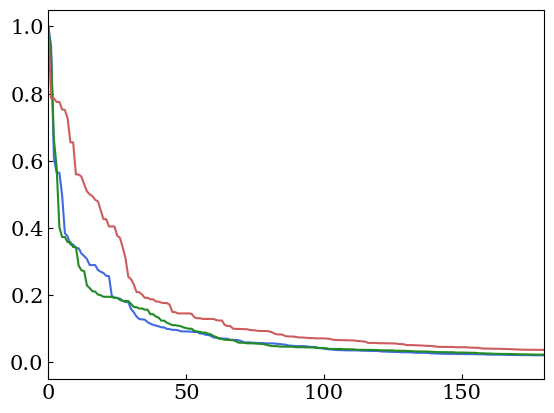

In [11]:
cc3m_relevant_integrated_count_files = [x for x in integrated_search_counts if 'cc3m' in x]
cc12m_relevant_integrated_count_files = [x for x in integrated_search_counts if 'cc12m' in x]
yfcc15m_relevant_integrated_count_files = [x for x in integrated_search_counts if 'yfcc15m' in x]

cc3m_integrated_concept_counts = []
cc12m_integrated_concept_counts = []
yfcc15m_integrated_concept_counts = []

for dataset in datasets:
    cc3m_integrated_f = '../search_counts/{}_cc3m_integrated_tlemmatized_i0.7_search_counts.json'.format(dataset)
    cc12m_integrated_f = '../search_counts/{}_cc12m_integrated_tlemmatized_i0.7_search_counts.json'.format(dataset)
    yfcc15m_integrated_f = '../search_counts/{}_yfcc15m_integrated_tlemmatized_i0.7_search_counts.json'.format(dataset)

    with open(cc3m_integrated_f) as f:
        curr_cc3m_integrated_counts = json.load(f)

    with open(cc12m_integrated_f) as f:
        curr_cc12m_integrated_counts = json.load(f)

    with open(yfcc15m_integrated_f) as f:
        curr_yfcc15m_integrated_counts = json.load(f)
    
    for k in sorted(list(curr_cc3m_integrated_counts.keys())):
        cc3m_integrated_concept_counts.append(curr_cc3m_integrated_counts[k])
        cc12m_integrated_concept_counts.append(curr_cc12m_integrated_counts[k])
        yfcc15m_integrated_concept_counts.append(curr_yfcc15m_integrated_counts[k])

np_cc3m_concept_counts = np.asarray(cc3m_integrated_concept_counts) / max(cc3m_integrated_concept_counts)
np_cc12m_concept_counts = np.asarray(cc12m_integrated_concept_counts) / max(cc12m_integrated_concept_counts)
np_yfcc15m_concept_counts = np.asarray(yfcc15m_integrated_concept_counts) / max(yfcc15m_integrated_concept_counts)

plt.figure()
plt.plot(sorted(np_cc3m_concept_counts[np_cc3m_concept_counts>0], reverse=True), c='royalblue', label='CC-3M')
plt.plot(sorted(np_cc12m_concept_counts[np_cc12m_concept_counts>0], reverse=True), c='forestgreen', label='CC-12M')
plt.plot(sorted(np_yfcc15m_concept_counts[np_yfcc15m_concept_counts>0], reverse=True), c='indianred', label='YFCC-15M')

# plt.xlabel('Concepts')
# ax = plt.gca()
# bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0)
# ax.annotate('(sorted in desc. freq. order)', 
#             xy=(0.5, -0.2), xycoords='axes fraction',
#             fontsize=rcParams["axes.labelsize"]-5, 
#             ha="center", va="center",
#             bbox=bbox_props,
#             color='grey')
# plt.ylabel('Normalised Frequency')
# plt.legend(loc='best', fontsize=16)
plt.xlim(0, 180)
# plt.xscale('log')
# plt.yscale('log')
# # plt.xticks(rotation=45)
plt.savefig('./plots/dpfm-paper-integrated-search-long-tailed-zoomed.png', dpi=500, bbox_inches='tight')